In [315]:
import pandas as pd

user = pd.read_csv("mv.csv")

In [320]:
user.loc[user.user_id == 278855
]

,Unnamed: 0,user_id,item_id,name,rating,genre
859977,NaN,278855,0451169522,x,10,Stephen King
859978,NaN,278855,0684867621,x,10,Stephen King
859979,NaN,278855,0451186362,x,10,Stephen King
859980,NaN,278855,0743457358,x,10,Stephen King
859981,NaN,278855,0451160525,x,10,Stephen King
859982,NaN,278855,0743467523,x,10,Stephen King
859983,NaN,278855,0743211375,x,10,Stephen King
859984,NaN,278855,0451169530,x,10,Stephen King
859985,NaN,278855,0451176464,x,10,Stephen King
859986,NaN,278855,0451177096,x,10,Stephen King


In [322]:
user = user.loc[user.rating != 0]

In [323]:
user.to_csv("mov.csv")

In [317]:
a = user.loc[user.genre=="Stephen King"].groupby(["name","item_id"]).count().sort_values(by="user_id").tail(20).reset_index().item_id.values
size = len(a)

In [311]:
user.groupby("genre").count().sort_values(by="user_id")

,Unnamed: 0,user_id,item_id,name,rating
genre,,,,,
Joseph E Persico,1,1,1,1,1
Jeannie Mills,1,1,1,1,1
Jeannie Oakes,1,1,1,1,1
Jeannie Peterson,1,1,1,1,1
Jeannie. Harmon,1,1,1,1,1
...,...,...,...,...,...
Mary Higgins Clark,4777,4777,4777,4777,4777
James Patterson,5845,5845,5845,5845,5845
John Grisham,6010,6010,6010,6010,6010


In [319]:
dict = {'user_id': [278855 for a in range(0,size)], 'item_id': a, 
                    'name': ["x" for a in range(0,size)], 'rating': [10 for a in range(0,size)], 'genre':["Stephen King" for a in range(0,size)]}

tmp_df = pd.DataFrame(dict)
user = pd.concat([user, tmp_df], ignore_index = True, axis = 0) 

In [328]:
sgd = pd.read_csv("1.csv")


In [324]:
als = pd.read_csv("1.csv")

<AxesSubplot:xlabel='range'>

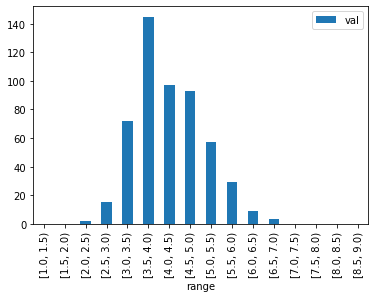

In [330]:
sgd.loc[sgd.genre=="Stephen King"].plot.bar(x="range",y="val")

<AxesSubplot:xlabel='range'>

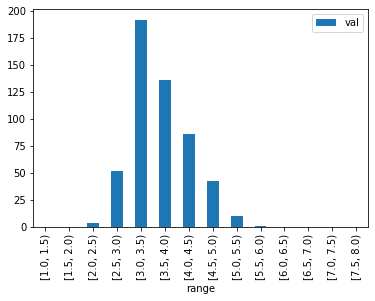

In [325]:
als.loc[als.genre=="Stephen King"].plot.bar(x="range",y="val")

<AxesSubplot:xlabel='range'>

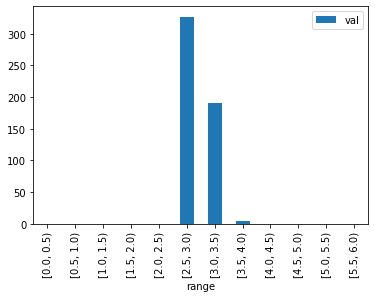

In [327]:
svd = pd.read_csv("1.csv")
svd.loc[svd.genre=="Stephen King"].plot.bar(x="range",y="val")

/var/folders/nw/yqw0rcy552v_47m8ghvzmccm0000gn/T/ipykernel_1564/813584044.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(x["range"],rotation = 45)
/var/folders/nw/yqw0rcy552v_47m8ghvzmccm0000gn/T/ipykernel_1564/813584044.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(x["range"],rotation = 45)
/var/folders/nw/yqw0rcy552v_47m8ghvzmccm0000gn/T/ipykernel_1564/813584044.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(x["range"],rotation = 45)


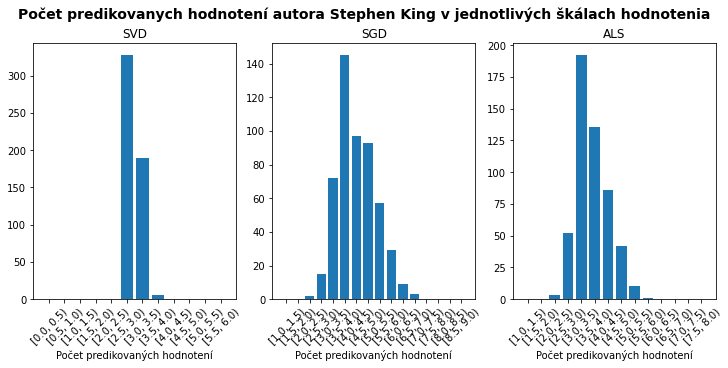

In [333]:

import matplotlib
matplotlib.use('Agg')

from matplotlib import pyplot as plt

import matplotlib.colors as mcolors


fig, axes = plt.subplots(
                        nrows=1,ncols=3, constrained_layout=True, figsize=[10,5]
                    )
fig.suptitle('Počet predikovanych hodnotení autora Stephen King v jednotlivých škálach hodnotenia', fontsize=14, fontweight='bold')
for i in range(0,3):
    if i == 0:

        x = svd.loc[svd.genre=="Stephen King"]
        axes[0].bar(x["range"],x["val"])
        axes[0].set_xlabel("Počet predikovaných hodnotení")
        axes[0].set_xticklabels(x["range"],rotation = 45)
        axes[0].set_title('SVD')
    if i == 1:
        x = sgd.loc[sgd.genre=="Stephen King"]
        axes[1].bar(x["range"],x["val"])
        axes[1].set_xlabel("Počet predikovaných hodnotení")
        axes[1].set_xticklabels(x["range"],rotation = 45)
        axes[1].set_title('SGD')
    if i == 2:
        x = als.loc[als.genre=="Stephen King"]
        axes[2].bar(x["range"],x["val"])
        axes[2].set_xlabel("Počet predikovaných hodnotení")
        axes[2].set_xticklabels(x["range"],rotation = 45)
        axes[2].set_title('ALS')
    
plt.savefig("books.png")

#ax = dataset.item_id.plot.bar()

        #ax.set_xlabel("range of prediction")
        #ax.set_ylabel("number of items")